## Import packages

In [70]:
import os
import sys
import json
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [71]:
parent_dir = os.path.join(os.getcwd(),"../src")
sys.path.insert(0, parent_dir)
from econ_utils import sql_queries as sqlq

## Test the API

In [72]:
phlx_semi = yf.Ticker("^SOX")

# get all stock info
phlx_semi.info

# get historical market data
hist = phlx_semi.history(period="1mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-07 00:00:00-04:00,4709.620117,4738.939941,4418.569824,4426.270020,0,0.0,0.0
2024-08-08 00:00:00-04:00,4552.160156,4736.720215,4472.350098,4730.009766,0,0.0,0.0
2024-08-09 00:00:00-04:00,4702.970215,4746.270020,4643.850098,4709.450195,0,0.0,0.0
2024-08-12 00:00:00-04:00,4729.270020,4800.169922,4690.209961,4743.819824,0,0.0,0.0
2024-08-13 00:00:00-04:00,4807.680176,4945.790039,4788.279785,4942.310059,0,0.0,0.0
2024-08-14 00:00:00-04:00,4981.779785,5000.109863,4852.359863,4933.350098,0,0.0,0.0
2024-08-15 00:00:00-04:00,5035.580078,5190.169922,5022.029785,5173.379883,0,0.0,0.0
2024-08-16 00:00:00-04:00,5108.720215,5186.120117,5100.140137,5170.250000,0,0.0,0.0
2024-08-19 00:00:00-04:00,5159.540039,5266.979980,5096.350098,5266.569824,0,0.0,0.0


## Get Data for the I Shares Semiconductor UCITS ETF
(Backtest Back to 2001)

In [73]:
ishares_semi = yf.Ticker("SOXX")

# get historical market data
soxx = ishares_semi.history(period="max")
soxx = soxx.reset_index()
soxx[:10]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,2001-07-13 00:00:00-04:00,20.030775,20.388171,19.554247,20.127743,603300,0.0,0.0,0.0
1,2001-07-16 00:00:00-04:00,19.767566,19.822977,18.961349,18.961349,180000,0.0,0.0,0.0
2,2001-07-17 00:00:00-04:00,18.825604,19.739872,18.811752,19.739872,287100,0.0,0.0,0.0
3,2001-07-18 00:00:00-04:00,19.144212,19.285508,18.922571,18.922571,301800,0.0,0.0,0.0
4,2001-07-19 00:00:00-04:00,20.058480,20.141595,19.726019,19.726019,405000,0.0,0.0,0.0
5,2001-07-20 00:00:00-04:00,19.324297,19.642905,19.324297,19.629053,360000,0.0,0.0,0.0
6,2001-07-23 00:00:00-04:00,19.739872,19.739872,19.033392,19.033392,195300,0.0,0.0,0.0
7,2001-07-24 00:00:00-04:00,18.922567,18.922567,18.506991,18.520844,150300,0.0,0.0,0.0
8,2001-07-25 00:00:00-04:00,18.451576,18.797889,18.188377,18.188377,179100,0.0,0.0,0.0
9,2001-07-26 00:00:00-04:00,18.991830,20.072327,18.922567,19.878393,281700,0.0,0.0,0.0


## Get Data for VanEck Semiconductors UCITS ETF
(The live index fund we can invest in)

In [74]:
vaneck_semi = yf.Ticker("SMGBL.XC")

# get historical market data
smgb = vaneck_semi.history(period="1mo")


## Save out this data to the database

In [75]:
soxx.Date

0      2001-07-13 00:00:00-04:00
1      2001-07-16 00:00:00-04:00
2      2001-07-17 00:00:00-04:00
3      2001-07-18 00:00:00-04:00
4      2001-07-19 00:00:00-04:00
                  ...           
5819   2024-08-30 00:00:00-04:00
5820   2024-09-03 00:00:00-04:00
5821   2024-09-04 00:00:00-04:00
5822   2024-09-05 00:00:00-04:00
5823   2024-09-06 00:00:00-04:00
Name: Date, Length: 5824, dtype: datetime64[ns, America/New_York]

In [76]:
engine = sqlq.get_sql_engine(os.path.join(os.getcwd(), '..','data', 'semi.db'))
sqlq.make_table(df = soxx, name = "soxx", engine = engine, if_exists ='replace')
sqlq.make_table(df = smgb, name = "smgb", engine = engine, if_exists ='replace')



In [77]:
#engine.dispose()

#### Clean the dataframe

In [78]:

soxx.columns = soxx.columns.str.lower()
soxx.drop(columns = ['high', 'low', 'dividends', 'stock splits', 'capital gains', 'volume'], inplace = True)
soxx[:3]

,date,open,close
0,2001-07-13 00:00:00-04:00,20.030775,20.127743
1,2001-07-16 00:00:00-04:00,19.767566,18.961349
2,2001-07-17 00:00:00-04:00,18.825604,19.739872


#### Add new columns

In [79]:
soxx['intraday_p_change'] = soxx.close - soxx.open
soxx.loc[1:,'day_p_change'] = soxx.close - soxx.close.shift(1)
soxx.loc[1:,'day_return'] = (soxx.day_p_change / soxx.close.shift(1))

# Add a 'total_return' column which is the cumulative product of (1 + day_return)
soxx['total_return'] = (1 + soxx['day_return']).cumprod()

# Calculate moving averages for 9, 50, 90, and 200 days
#soxx['sma_9'] = soxx['close'].rolling(window=9).mean()
#soxx['sma_50'] = soxx['close'].rolling(window=50).mean()
#soxx['sma_90'] = soxx['close'].rolling(window=90).mean()
#soxx['sma_200'] = soxx['close'].rolling(window=200).mean()

# Calculate exponential moving averages (EMAs) with smoothing factor of 2
period_size = 3
soxx['ema_50'] = soxx['close'].ewm(span=50*period_size, adjust=False).mean()
soxx['ema_90'] = soxx['close'].ewm(span=90*period_size, adjust=False).mean()
soxx['ema_200'] = soxx['close'].ewm(span=200*period_size, adjust=False).mean()

# Calculate the macd
soxx['macd'] = soxx.ema_50 - soxx.ema_90

# Calculate the signal
soxx['signal'] = soxx['macd'].ewm(span=9*0.5*period_size, adjust=False).mean()

soxx['trigger'] = (soxx['macd'] < soxx['signal']).astype(int)

# add a day return for strategy_1: go to cash when macd crosses below its 9 period moving average
soxx['strategy_1_day_return'] = (1 - soxx.trigger)*soxx.day_return
soxx['strategy_1_total_return'] = (1 + soxx['strategy_1_day_return']).cumprod()


#soxx[:6]

#### Get the Annualised Total Returns

In [80]:
# Function to calculate annualized return
def calculate_annualized_return(cum_return, days, periods_per_year=365):
    #print(days)
    return ((cum_return) ** (periods_per_year / days)) - 1

# Assuming 'soxx' DataFrame and 'total_return' and 'strategy_1_total_return' columns are already present
# Calculate the number of days up to each date in terms of index steps
soxx['days'] = np.arange(len(soxx))  # Simple integer index, so days are just the index itself

# Calculate annualized total return for no strategy
soxx.loc[1:,'annualized_return_no_strategy'] = soxx[1:].apply(
    lambda row: calculate_annualized_return(row['total_return'], row['days']),
    axis=1
)

# Calculate annualized total return for strategy_1
soxx.loc[1:,'annualized_return_strategy_1'] = soxx[1:].apply(
    lambda row: calculate_annualized_return(row['strategy_1_total_return'], row['days']),
    axis=1
)

# Drop the 'days' column if no longer needed
soxx.drop(columns='days', inplace=True)

# Get the annualised TRs for Each
tr = round(list(soxx.annualized_return_no_strategy)[-1],2)
strategy_1_tr = round(list(soxx.annualized_return_strategy_1)[-1],2)

# Display the first few rows to verify
#display(soxx[['date','total_return', 'strategy_1_total_return', 'annualized_return_no_strategy', 'annualized_return_strategy_1']].tail())



#### Visualise price performance

In [89]:
type(soxx['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

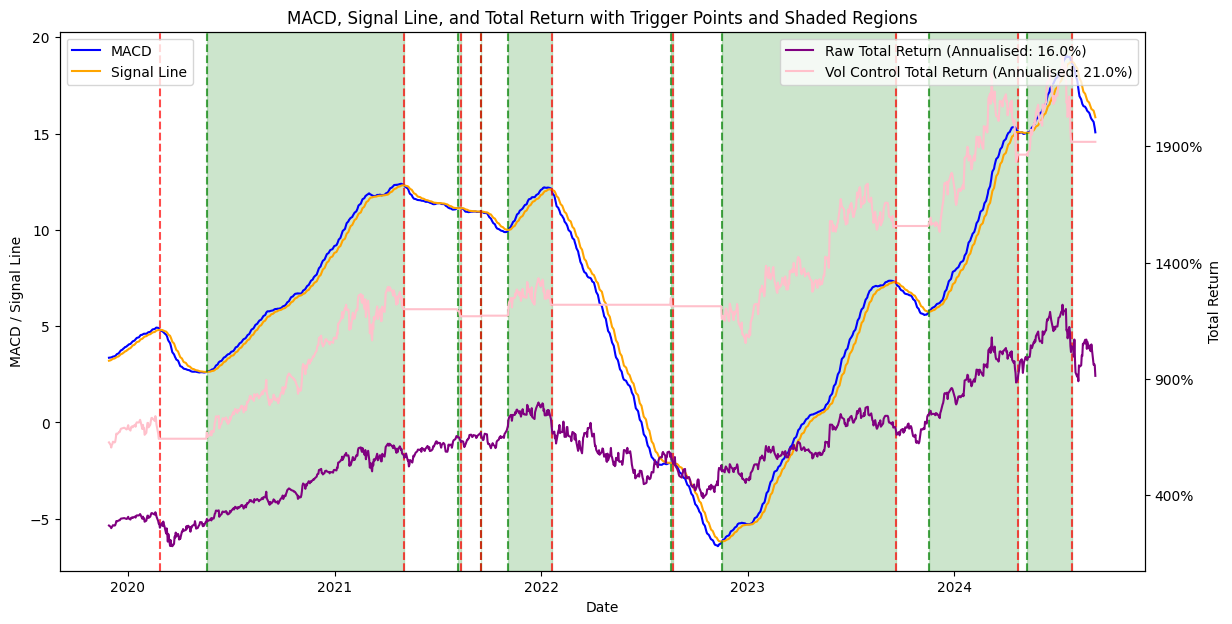

In [82]:
def macd_vis(soxx, figs_dir = "../docs/subpages_1"):
    # Ensure 'date' is set as the x-axis for plotting
    x_dates = soxx['date']  # Assuming 'date' is the column with date information
    
    # Create the plot with a secondary y-axis
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    # Plot MACD and Signal line on the primary y-axis (ax1)
    ax1.plot(x_dates, soxx['macd'], label='MACD', color='blue')
    ax1.plot(x_dates, soxx['signal'], label='Signal Line', color='orange')
    
    # Find where the trigger changes (from 1 to 0 or 0 to 1)
    trigger_changes = soxx['trigger'].diff().fillna(0)
    
    # Initialize variables for tracking green-red pairs
    green_start = None
    
    # Add vertical lines and highlight background
    for i in range(1, len(soxx)):
        if trigger_changes.iloc[i] == -1:  # Trigger changed from 1 to 0
            # Green line for sell signal
            ax1.axvline(x=x_dates.iloc[i], color='green', linestyle='--', alpha=0.7)
            green_start = x_dates.iloc[i]  # Mark the start of the green-red region
        elif trigger_changes.iloc[i] == 1:  # Trigger changed from 0 to 1
            # Red line for buy signal
            ax1.axvline(x=x_dates.iloc[i], color='red', linestyle='--', alpha=0.7)
            if green_start is not None:
                # Shade the region between the green and red lines
                ax1.axvspan(green_start, x_dates.iloc[i], color='green', alpha=0.2)
                green_start = None  # Reset the start marker
    
    # Labels and title for primary axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('MACD / Signal Line')
    ax1.set_title('MACD, Signal Line, and Total Return with Trigger Points and Shaded Regions')
    ax1.legend(loc='upper left')

    # Create a secondary y-axis to plot total return
    ax2 = ax1.twinx()
    ax2.plot(x_dates, soxx['total_return'], label=f'Raw Total Return (Annualised: {tr*100}%)', color='purple')
    ax2.plot(x_dates, soxx['strategy_1_total_return'], label=f'Vol Control Total Return (Annualised: {strategy_1_tr*100}%)', color='pink')
    # Convert to %
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{(x - 1) * 100:.0f}%'))
    ax2.set_ylabel('Total Return')
    
    # Add a legend for the secondary axis
    ax2.legend(loc='upper right')

    # Save it out
    plt.savefig(os.path.join(figs_dir, "macd_vis.svg"))

    # Display the plot
    plt.show()

# Call the function with the soxx DataFrame
macd_vis(soxx[-1200:])
